In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\vedap\Downloads\amazon_products_dataset.csv")
df.head(5)
df.tail(5)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2000 non-null   object 
 1   brand           2000 non-null   object 
 2   category        1998 non-null   object 
 3   actual_price    1998 non-null   float64
 4   discount_price  1999 non-null   float64
 5   rating          1996 non-null   float64
 6   rating_count    1996 non-null   float64
dtypes: float64(4), object(3)
memory usage: 109.5+ KB


In [3]:
import pandas as pd
unique_categories = df['category'].unique()
print(unique_categories)

unique_categories = df['category'].drop_duplicates()
print(unique_categories)

unique_categories = set(df['category'])
print(unique_categories)


['Laptop' 'Smartwatch' 'Headphones' 'Camera' 'Monitor' 'Speaker' 'Tablet'
 'Smartphone' nan]
0          Laptop
1      Smartwatch
2      Headphones
3          Camera
4         Monitor
9         Speaker
10         Tablet
13     Smartphone
991           NaN
Name: category, dtype: object
{'Laptop', 'Tablet', 'Smartphone', 'Smartwatch', nan, 'Monitor', 'Speaker', 'Headphones', 'Camera'}


In [5]:
missing = df.isnull().sum()
print(missing[missing > 0])

for col in df.select_dtypes(include=['int64','float64']):
    print(col)
    print(df[col].describe())


category          2
actual_price      2
discount_price    1
rating            4
rating_count      4
dtype: int64
actual_price
count     1998.000000
mean     39595.531031
std      23126.895054
min        360.000000
25%      19931.000000
50%      39279.000000
75%      59755.500000
max      79993.000000
Name: actual_price, dtype: float64
discount_price
count     1999.000000
mean     37136.040070
std      23023.843063
min        103.000000
25%      17114.500000
50%      36686.000000
75%      57188.500000
max      79628.000000
Name: discount_price, dtype: float64
rating
count    1996.000000
mean        2.952655
std         1.126949
min         1.000000
25%         2.000000
50%         2.900000
75%         3.900000
max         5.000000
Name: rating, dtype: float64
rating_count
count     1996.000000
mean     10019.726954
std       5801.490045
min          5.000000
25%       4959.000000
50%       9885.000000
75%      15227.000000
max      19995.000000
Name: rating_count, dtype: float64


In [7]:
df[['discount_price', 'rating']] = df[['discount_price', 'rating']].fillna(df[['discount_price', 'rating']].median())

In [9]:
df[['brand', 'category']] = df[['brand', 'category']].fillna('Unknown')

In [11]:
df = df.drop_duplicates()

In [15]:
df['rating'] = df['rating'].apply(pd.to_numeric, errors='coerce')

In [17]:
df.reset_index(drop=True, inplace=True)

In [19]:
top_5_expensive = df.sort_values(by='actual_price', ascending=False).head(5)
print(top_5_expensive)

                 title  brand    category  actual_price  discount_price  \
1383    Android Tablet    JBL      Laptop       79993.0         78094.0   
1974     Gaming Laptop     LG     Monitor       79869.0         77173.0   
1403  4K Action Camera   Sony  Headphones       79857.0         77469.0   
1351    Android Tablet   Sony     Monitor       79853.0         78831.0   
42       Gaming Laptop  Apple  Smartwatch       79826.0         76919.0   

      rating  rating_count  
1383     3.0        7666.0  
1974     2.6        5232.0  
1403     2.7        1379.0  
1351     4.8        7596.0  
42       3.8       10252.0  


In [21]:
top_brand = df['brand'].value_counts().idxmax()
count = df['brand'].value_counts().max()

print(f"Brand with the most products: {top_brand} ({count} products)")

Brand with the most products: Boat (214 products)


In [23]:
df['discount_percent'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100
avg_discount_per_brand = df.groupby('brand')['discount_percent'].mean().sort_values(ascending=False)
print(avg_discount_per_brand)

brand
Apple      12.721996
Boat       12.546502
LG         11.559797
HP         11.501202
OnePlus    11.380987
JBL        11.370137
Dell       11.165004
Sony       10.816592
Mi         10.162308
Samsung     9.326064
Name: discount_percent, dtype: float64


In [25]:
print(df[(df['rating']>=4.5) & (df['rating_count']>=2000)])

                               title    brand    category  actual_price  \
4                Smart Fitness Watch  Samsung     Monitor       49224.0   
32                  4K Action Camera  OnePlus  Smartphone        7793.0   
51     Wireless Bluetooth Headphones     Dell  Headphones       61569.0   
52           Laptop with SSD Storage     Boat  Smartwatch       76286.0   
59                     Gaming Laptop  Samsung      Tablet       45250.0   
...                              ...      ...         ...           ...   
1949      Portable Bluetooth Speaker  OnePlus      Tablet       59325.0   
1970                  Android Tablet     Boat      Camera       20841.0   
1975   Wireless Bluetooth Headphones  Samsung  Smartwatch       31973.0   
1982   Wireless Bluetooth Headphones       HP      Camera       15343.0   
1988  Smartphone with AMOLED Display       LG      Tablet       29783.0   

      discount_price  rating  rating_count  discount_percent  
4            45017.0     4.9       1

In [27]:
avg_price_per_category = df.groupby('category')['actual_price'].mean().sort_values(ascending=False)
print(avg_price_per_category)

category
Laptop        40822.874477
Camera        40352.246094
Monitor       39950.747212
Tablet        39943.815217
Speaker       39683.795276
Headphones    39576.147679
Smartwatch    38316.913934
Smartphone    37909.529412
Unknown       33610.500000
Name: actual_price, dtype: float64


In [33]:
import numpy as np
df['price_category']=pd.cut(df['actual_price'], bins=[-np.inf, 500, 2000, np.inf], labels=['Budget', 'Midrange', 'Premium'])
df['price_category'].value_counts()

price_category
Premium     1942
Midrange      51
Budget         5
Name: count, dtype: int64

In [37]:
df['popularity_score'] = df['rating'] * np.log(df['rating_count'] + 1)

In [41]:
top_10_popular = df.sort_values(by='popularity_score', ascending=False).head(10)
print(top_10_popular[['category', 'brand', 'popularity_score']])

        category    brand  popularity_score
1418      Laptop  OnePlus         49.130602
297       Camera  Samsung         48.928304
502       Camera  Samsung         48.625690
1400  Headphones     Dell         48.388891
878   Smartwatch    Apple         48.248857
1489      Laptop    Apple         48.240292
848   Smartphone       HP         48.157775
854   Smartwatch  Samsung         48.040676
1625      Tablet     Dell         47.848110
637   Headphones     Dell         47.803700


In [43]:
premium_high_discount = df[(df['price_category'] == 'Premium') & (df['discount_percent'] > 40)]
print(premium_high_discount)

                               title    brand    category  actual_price  \
6     Smartphone with AMOLED Display  OnePlus      Laptop       10026.0   
20                  4K Action Camera  OnePlus  Headphones        4378.0   
53          Noise Cancelling Earbuds      JBL      Camera        2335.0   
74           High Resolution Monitor     Boat     Monitor        5137.0   
104          High Resolution Monitor     Sony      Tablet        4933.0   
...                              ...      ...         ...           ...   
1793         High Resolution Monitor       Mi  Headphones        3620.0   
1834   Wireless Bluetooth Headphones     Boat  Headphones        5377.0   
1841        Noise Cancelling Earbuds  OnePlus  Smartwatch        5877.0   
1875   Wireless Bluetooth Headphones     Dell      Laptop       11037.0   
1879      Portable Bluetooth Speaker     Boat      Tablet        5447.0   

      discount_price  rating  rating_count  discount_percent price_category  \
6             5451.0

In [45]:
bluetooth_products = df[df['category'].str.contains('Bluetooth', case=False, na=False)]
print(bluetooth_products)


Empty DataFrame
Columns: [title, brand, category, actual_price, discount_price, rating, rating_count, discount_percent, price_category, popularity_score]
Index: []


In [49]:
top_30_percentile = df['popularity_score'].quantile(0.7)

filtered_products = df[
    (df['rating'] >= 4.0) &
    (df['discount_percent'].between(20, 50)) &
    (df['popularity_score'] >= top_30_percentile)
]

filtered_products[['category', 'brand', 'rating', 'discount_percent', 'popularity_score']]


,category,brand,rating,discount_percent,popularity_score
32,Smartphone,OnePlus,4.6,23.610933,39.240319
94,Monitor,HP,4.4,21.689484,43.530902
107,Smartphone,JBL,4.3,34.469075,42.375962
140,Tablet,Sony,5.0,26.733507,40.235948
162,Speaker,Apple,4.6,31.255244,44.120959
165,Smartwatch,Apple,4.3,44.656389,41.437328
188,Smartphone,LG,4.4,48.684854,43.450614
215,Camera,Apple,4.9,28.626520,46.636622
274,Speaker,Sony,4.9,21.979321,47.197155
404,Laptop,Samsung,4.4,24.355722,42.175826


In [51]:
avg_discount_per_brand = df.groupby('brand')['discount_percent'].mean().sort_values(ascending=False)
print(avg_discount_per_brand)

brand
Apple      12.721996
Boat       12.546502
LG         11.559797
HP         11.501202
OnePlus    11.380987
JBL        11.370137
Dell       11.165004
Sony       10.816592
Mi         10.162308
Samsung     9.326064
Name: discount_percent, dtype: float64


In [55]:
avg_popularity_per_category = df.groupby('actual_price')['popularity_score'].mean().sort_values(ascending=False)
print(avg_popularity_per_category)

actual_price
22786.0    49.130602
52713.0    48.928304
17858.0    48.625690
11025.0    48.388891
4436.0     48.248857
             ...    
54830.0     3.762695
36847.0          NaN
42279.0          NaN
49478.0          NaN
61547.0          NaN
Name: popularity_score, Length: 1977, dtype: float64


In [57]:
avg_discount_per_category = df.groupby('actual_price')['discount_percent'].mean()
highest_discount_category = avg_discount_per_category.idxmax()
print(f"Category with highest average discount: {highest_discount_category}")


Category with highest average discount: 4378.0


In [61]:
df['revenue_potential'] = df['actual_price'] * df['rating_count']

revenue_per_brand = df.groupby('brand')['revenue_potential'].sum()
print(revenue_per_brand)

brand
Apple      6.663722e+10
Boat       7.695298e+10
Dell       7.549826e+10
HP         8.297444e+10
JBL        7.723438e+10
LG         7.992613e+10
Mi         7.698029e+10
OnePlus    8.247380e+10
Samsung    8.117230e+10
Sony       7.868645e+10
Name: revenue_potential, dtype: float64


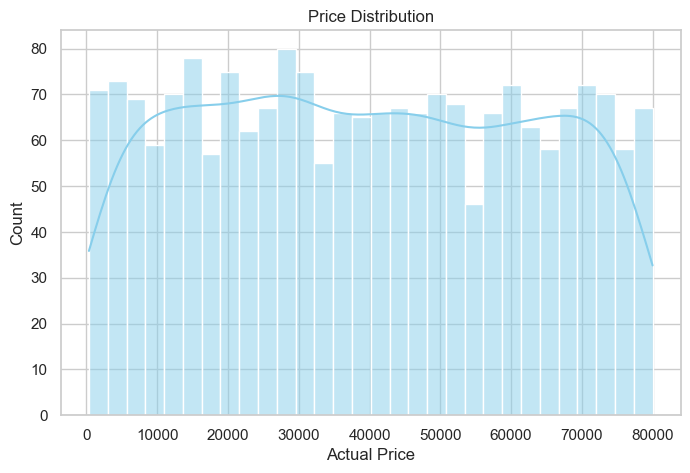

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

#Price distribution → Histogram + KDE
plt.figure(figsize=(8,5))
sns.histplot(df['actual_price'], kde=True, bins=30, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Actual Price')
plt.ylabel('Count')
plt.show()

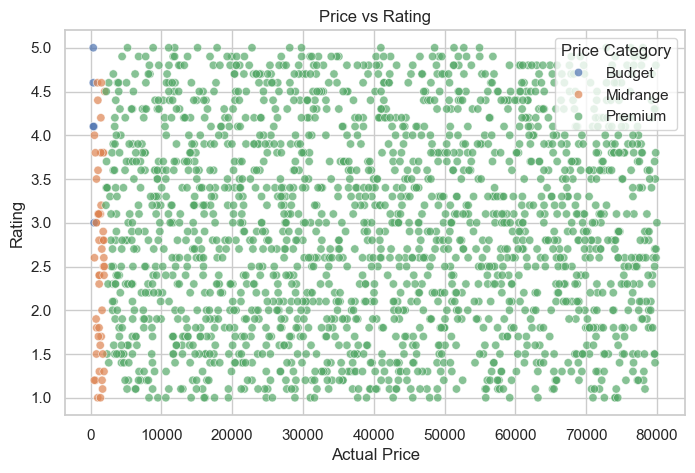

In [65]:
# Relationship between price and rating → Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='actual_price', y='rating', data=df, hue='price_category', alpha=0.7)
plt.title('Price vs Rating')
plt.xlabel('Actual Price')
plt.ylabel('Rating')
plt.legend(title='Price Category')
plt.show()

C:\Users\vedap\AppData\Local\Temp\ipykernel_23196\1597480934.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_per_category.index, y=avg_rating_per_category.values, palette='viridis')


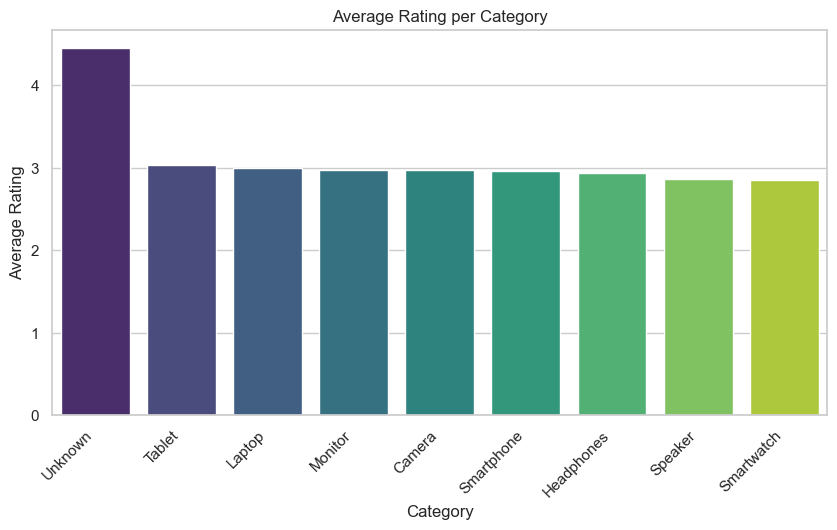

In [67]:
#Category-wise average rating → Bar Plot
plt.figure(figsize=(10,5))
avg_rating_per_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_rating_per_category.index, y=avg_rating_per_category.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Rating per Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()

C:\Users\vedap\AppData\Local\Temp\ipykernel_23196\1956145019.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette='coolwarm')


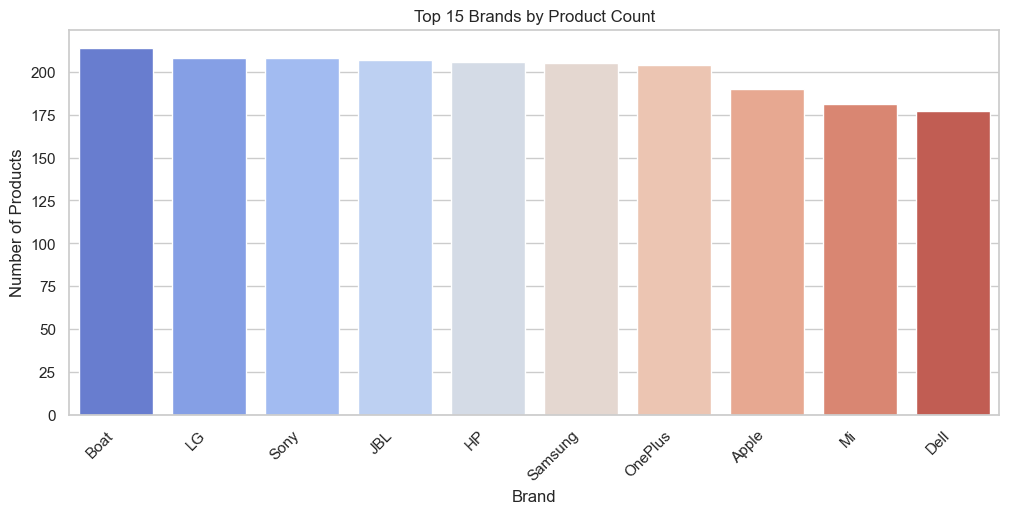

In [69]:
# Brand product count → Count Plot
plt.figure(figsize=(12,5))
top_brands = df['brand'].value_counts().nlargest(15)  # top 15 brands for readability
sns.barplot(x=top_brands.index, y=top_brands.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Brands by Product Count')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.show()

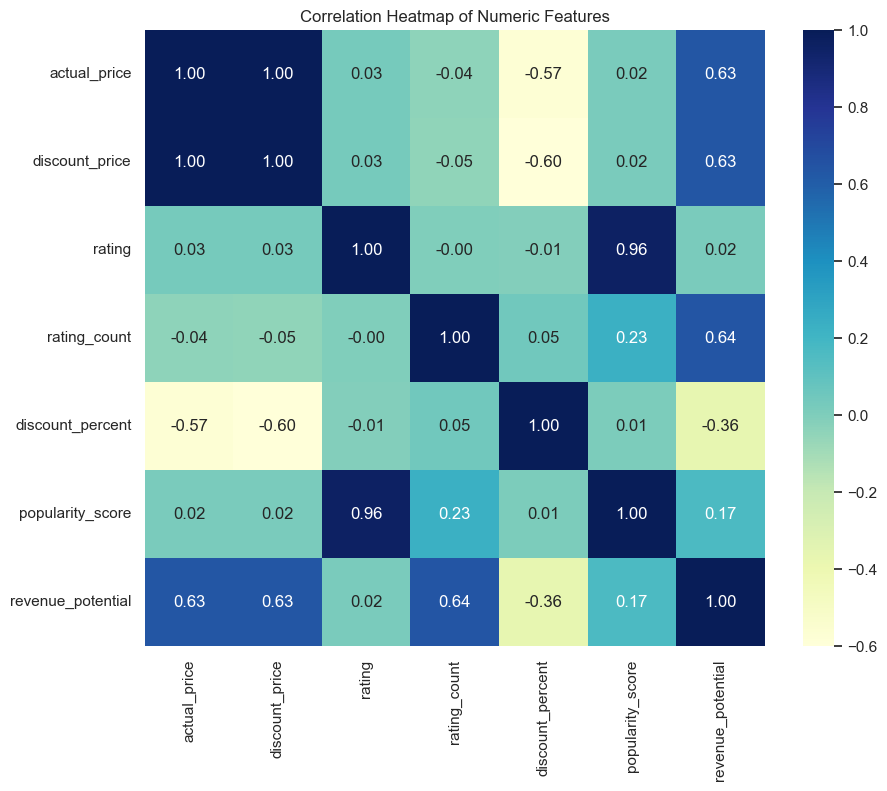

In [71]:
#Numeric feature correlations → Heatmap
plt.figure(figsize=(10,8))
numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.title("correlation heatmap 